# 1. Problem Statement:
    

A credit card is the most widely used electronic payment method because of the increasing volume of daily electronic transactions, making it more vulnerable to fraud. Credit card fraud is increasing due to which financial loss are increasing drstically. The detection of credit card fraud is currently the most common issue. Credit card companies are looking for the right technologies and systems to detect and reducing fraud of transactions on the credit card.

# 2. Project Objective:
  The project objective is to build a machine learning model that will accurately identify a fraudulent credit card transaction. 

# 3. Data Description:
  The dataset contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#  Importing dataset

In [2]:
data= pd.read_csv("creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


In [4]:
data.shape

(11665, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   V1      11665 non-null  float64
 2   V2      11665 non-null  float64
 3   V3      11665 non-null  float64
 4   V4      11665 non-null  float64
 5   V5      11665 non-null  float64
 6   V6      11665 non-null  float64
 7   V7      11665 non-null  float64
 8   V8      11665 non-null  float64
 9   V9      11665 non-null  float64
 10  V10     11665 non-null  float64
 11  V11     11665 non-null  float64
 12  V12     11664 non-null  float64
 13  V13     11664 non-null  float64
 14  V14     11664 non-null  float64
 15  V15     11664 non-null  float64
 16  V16     11664 non-null  float64
 17  V17     11664 non-null  float64
 18  V18     11664 non-null  float64
 19  V19     11664 non-null  float64
 20  V20     11664 non-null  float64
 21  V21     11664 non-null  float64
 22

# Checking for null values

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# Since the null values are very less it is advisable to drop them.
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Plotting the number of Genuine and Fraud cases reported

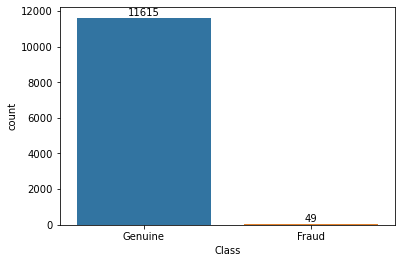

In [9]:
ax=sns.countplot(x='Class', data=data)
for container in ax.containers:
    ax.bar_label(container, size=10)
plt.xticks(range(2),['Genuine', 'Fraud'])
plt.show()

From above visualisation it is observed that the column 'Class' is imbalance thus it is required to apply stratified sampling while splitting the dataframe into train and test sets. Also will evaluate the model using AUC instead of confusion matrix.

# Plotting the distribution of feature 'Amount'

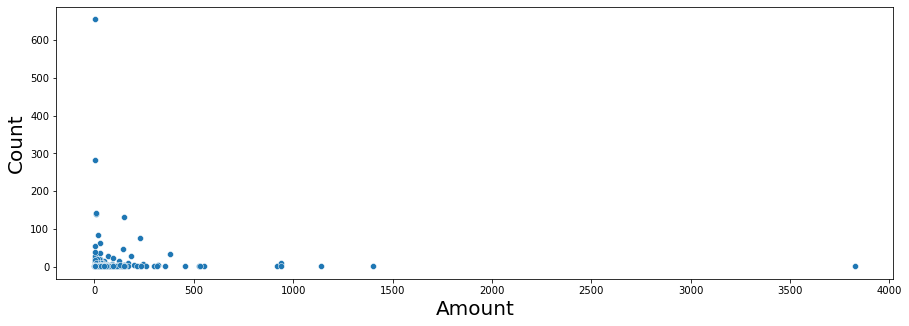

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=data['Amount'], y=data['Amount'].value_counts())
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

# Splitting dataset into independent features and target variables

In [11]:
from sklearn.model_selection import train_test_split
x=data.drop(['Class'], axis=1)
y=data['Class']

# Without stratified sampling
   

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size=0.3, random_state=42)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3499, 30)
(3499,)
(8165, 30)
(8165,)


In [14]:
Y_train.value_counts(normalize=True)

0.0    0.996856
1.0    0.003144
Name: Class, dtype: float64

In [15]:
Y_test.value_counts(normalize=True)

0.0    0.995346
1.0    0.004654
Name: Class, dtype: float64

# With stratified sampling
   below train, test split is used for model building

In [16]:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.3, stratify= y, random_state=42)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3499, 30)
(3499,)
(8165, 30)
(8165,)


In [18]:
y_train.value_counts(normalize=True)

0.0    0.995713
1.0    0.004287
Name: Class, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

0.0    0.995836
1.0    0.004164
Name: Class, dtype: float64

# 4. Building Model and its Evaluation
Here models will be built using
1) Decision Tree , and   
2) Logistic Regression

The models will be evaluated using accuracy score  and roc_auc_score since the class distribution is imbalanced.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
from sklearn import metrics

# Decison Tree model

In [23]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
pred= model.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
acc=round((accuracy_score(pred, y_test)*100),3)
area = round((metrics.roc_auc_score(y_test, pred)*100),3)
print('Accuracy: ',acc)
print('Area under score: ', area)

Accuracy:  99.816
Area under score:  94.05


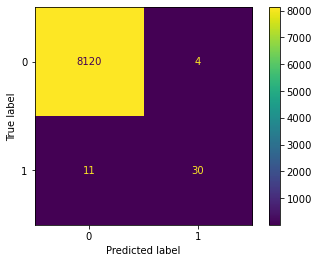

In [26]:
c=confusion_matrix(pred, y_test)
cm_display=metrics.ConfusionMatrixDisplay(c)
cm_display.plot()
plt.show()

# Logistics Regression model

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['Amount']=sc.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time']=sc.fit_transform(data['Time'].values.reshape(-1, 1))

In [28]:
x=data.drop(['Class'], axis=1)
y=data['Class']

In [29]:

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.3, stratify= y, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [31]:
lr_pred=lr.predict(x_test)

In [32]:
lr_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
print('Accuracy :', accuracy_score(y_test, lr_pred)*100)
print('Area_under_curve : ',round((metrics.roc_auc_score(y_test, lr_pred)*100),3))

Accuracy : 99.7917942437232
Area_under_curve :  95.502


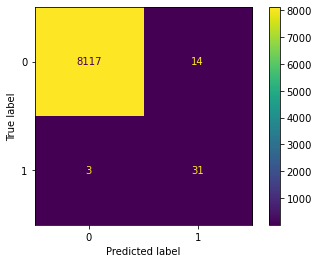

In [34]:
c=confusion_matrix(y_test, lr_pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=c)
cm_display.plot()
plt.show()

# 5. Inferences
1) From above result the best model for Desicion Tree model for the given dataset is at the max_depth of 2, accuracy=99.79% , Area_under_curve=94.038
  
2) Logistics Regression model scored accuracy of 99.79 %, Area_under_curve=95.5.
  